In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import emoji

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sakshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sakshi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sakshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("/home/sakshi/Documents/ai-powered/data_before_processing.csv")

In [4]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Removing emojis and tokenzing words
# Remove stopwords

stop_words = set(stopwords.words('english'))

df['selftext'] = df['selftext'].astype(str)  

df['proctext'] = df['selftext'].apply(lambda x: ' '.join(
    [word for word in x.split() if word.lower() not in stop_words]
))  
df['proctext'] = df['proctext'].apply(lambda x: emoji.replace_emoji(x, replace=""))  

print(df[['selftext', 'proctext']].head())

                                            selftext  \
0  I'm a 24m dealing with toxic shame from things...   
1  In my life everyone hates me no one Ceres and ...   
2  I don't know what's going on with me lately. I...   
3  I have lost all my close friends. Don't know w...   
4  That sensation of giving in and wanting it all...   

                                            proctext  
0  24m dealing toxic shame things past letting hi...  
1  life everyone hates one Ceres act like thinkin...  
2  know what's going lately. depression many year...  
3  lost close friends. know do. Long story short....  
4  sensation giving wanting end back. I’ve laid c...  


In [6]:
# Expanding contractions

import contractions

df['proctext'] = df['proctext'].apply(lambda x: contractions.fix(x))  

print(df[['proctext']].head())

                                            proctext
0  24m dealing toxic shame things past letting hi...
1  life everyone hates one Ceres act like thinkin...
2  know what is going lately. depression many yea...
3  lost close friends. know do. Long story short....
4  sensation giving wanting end back. I have laid...


In [7]:
# Tokenizing words

from nltk import word_tokenize

df['proctext'] = df['proctext'].apply(word_tokenize)

print(df[['proctext']].head())

                                            proctext
0  , dealing, toxic, shame, things, past, let...
1  [life, everyone, hates, one, Ceres, act, like,...
2  [know, what, is, going, lately, ., depression,...
3  [lost, close, friends, ., know, do, ., Long, s...
4  [sensation, giving, wanting, end, back, ., I, ...


In [8]:
# Removing stopwords

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['proctext'] = df['proctext'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

print(df[['proctext']].head())

                                            proctext
0  , dealing, toxic, shame, things, past, let...
1  [life, everyone, hates, one, Ceres, act, like,...
2  [know, going, lately, ., depression, many, yea...
3  [lost, close, friends, ., know, ., Long, story...
4  [sensation, giving, wanting, end, back, ., I, ...


In [16]:
# Lemmatization

from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df['proctext'] = df['proctext'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])  
df['proctext'] = df['proctext'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])  

print(df[['proctext']].head())

                                            proctext
0  [2, 4, m,  , d, e, a, l,  , t, o, x, i, c,  , ...
1  [l, i, f, e,  , e, v, e, r, y, o, n,  , h, a, ...
2  [k, n, o, w,  , g, o,  , l, a, t, e,  , d, e, ...
3  [l, o, s, t,  , c, l, o, s, e,  , f, r, i, e, ...
4  [s, e, n, s, a, t,  , g, i, v, e,  , w, a, n, ...


In [12]:
# Removing punctuation

import string

df['proctext'] = df['proctext'].apply(lambda x: [word for word in x if word not in string.punctuation])

print(df[['proctext']].head())

                                            proctext
0  , deal, toxic, shame, thing, past, let, hi...
1  [life, everyon, hate, one, cere, act, like, th...
2  [know, go, late, depress, mani, year, feel, li...
3  [lost, close, friend, know, long, stori, short...
4  [sensat, give, want, end, back, i, laid, count...


In [ ]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'http?://\S+|www\.\S+')
    return url_pattern.sub('', text)

text_with_urls = "Check out this website: https://www.example.com or visit www.another-site.org for more info."
text_without_urls = remove_urls(text_with_urls)
print(f"Original text: {text_with_urls}")
print(f"Text without URLs: {text_without_urls}")

# If your text data is in a pandas DataFrame column:
import pandas as pd

# Assuming your DataFrame is named 'df' and the text column is 'proctext'
# df['proctext_no_urls'] = df['proctext'].apply(remove_urls)
# print(df[['proctext', 'proctext_no_urls']].head())

In [13]:
from textblob import TextBlob

df['proctext'] = df['proctext'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

df['sentiment'] = df['proctext'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0.5 else 'Negative' if x < 0 else 'Neutral')

print(df[['proctext', 'sentiment', 'sentiment_label']].head(20))

                                             proctext  sentiment  \
0   24m deal toxic shame thing past let hinder asp...  -0.133333   
1   life everyon hate one cere act like think kill...  -0.300000   
2   know go late depress mani year feel like okay ...  -0.094600   
3   lost close friend know long stori short 18 rec...   0.137879   
4   sensat give want end back i laid countless nig...  -0.325000   
5   hi guy european guy studi unit state never rea...  -0.058730   
6   kind of cri help life struggl depress anxieti ...   0.078452   
7   god i tir whatev father say neg suffer grandma...  -0.054315   
8   depress hit realli hard insecur neg self talk ...  -0.005556   
9   16yr old like peopl nice life nice grade frien...  -0.091667   
10  know take care even small stuff feel exhaust t...   0.104000   
11  anyon feel enorm weight everyth go u polit lat...  -0.021496   
12  alway yearn self got cheat sort trauma let sel...   0.209361   
13  i decent place life i healthi relationship f

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = df['proctext'].astype(str)  

vectorizer = TfidfVectorizer(max_features=50)  
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

average_tfidf_scores = tfidf_matrix.mean(axis=0).A1  
word_scores = dict(zip(feature_names, average_tfidf_scores))

sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

print("Top High-Risk Crisis Terms:")
for word, score in sorted_words[:20]:  
    print(f"{word}: {score:.4f}")

Top High-Risk Crisis Terms:
feel: 0.1447
like: 0.1277
want: 0.1103
know: 0.1033
get: 0.1030
go: 0.0984
life: 0.0824
time: 0.0778
day: 0.0738
even: 0.0737
year: 0.0693
think: 0.0684
help: 0.0681
would: 0.0669
anxieti: 0.0664
tri: 0.0663
realli: 0.0661
thing: 0.0624
one: 0.0613
peopl: 0.0598


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('processed_reddit_data.csv')

df['proctext'] = df['proctext'].fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['proctext'])

high_risk_keywords = ["suicide", "kill myself", "end it", "not want to live", "die", "unalive"]
moderate_concern_keywords = ["help", "lost", "struggle", "hopeless", "support"]
low_concern_keywords = ["stress", "anxiety", "depression", "overwhelmed", "sad"]

def categorize_post_tfidf(post, tfidf_vectorizer, high_risk_keywords, moderate_concern_keywords, low_concern_keywords):
    post_vector = tfidf_vectorizer.transform([post])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    post_features = {feature_names[i]: post_vector[0, i] for i in post_vector.nonzero()[1]}
    
    if any(keyword in post_features for keyword in high_risk_keywords):
        return "High-Risk"
    elif any(keyword in post_features for keyword in moderate_concern_keywords):
        return "Moderate Concern"
    elif any(keyword in post_features for keyword in low_concern_keywords):
        return "Low Concern"
    else:
        return "Unknown"

df['risk_level'] = df['proctext'].apply(
    lambda x: categorize_post_tfidf(x, tfidf_vectorizer, high_risk_keywords, moderate_concern_keywords, low_concern_keywords)
)

print(df[['proctext', 'risk_level']].head())

                                            proctext        risk_level
0  24m deal toxic shame thing past let hinder asp...           Unknown
1  life everyon hate one cere act like think kill...           Unknown
2  know go late depress mani year feel like okay ...  Moderate Concern
3  lost close friend know long stori short 18 rec...  Moderate Concern
4  sensat give want end back laid countless night...           Unknown


In [13]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd

df = pd.read_csv('processed_reddit_data.csv')

df['proctext'] = df['proctext'].fillna('').astype(str)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

bert_embeddings = np.array([get_bert_embeddings(text) for text in df['proctext']])

/home/sakshi/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-26 21:41:51.259961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-26 21:41:51.274633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743005511.294958    9717 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743005511.302416    9717 cuda_blas.cc:1407] Unable to 

In [ ]:
#what do we do about the slang and censored words that come up due to social media censoring, like kill is also called unalive now, or die is also d!e

In [14]:
print(bert_embeddings)

[[[-1.0334441e-01 -1.2316852e-03  6.7409593e-01 ... -3.4048063e-01
   -3.9263163e-02 -5.0352822e-04]]

 [[ 1.0450419e-01  3.0996373e-01  6.5675521e-01 ... -6.4808005e-01
    1.5808739e-01 -2.2700147e-01]]

 [[-2.6940271e-01 -2.2484684e-01  7.4433798e-01 ... -3.4273896e-01
   -1.8045604e-01 -8.2647137e-02]]

 ...

 [[-3.3005652e-01 -6.3812621e-03  3.9491674e-01 ... -5.1560384e-01
   -9.0304554e-02  4.6313763e-01]]

 [[-4.1177863e-01 -5.8633704e-02  7.0672405e-01 ... -5.0547856e-01
   -7.5565189e-02  5.9663247e-02]]

 [[-3.3195384e-02 -2.1978228e-01  8.1471634e-01 ... -2.1001236e-01
   -1.1199527e-01  3.5263091e-02]]]


Risk_Level
Moderate Concern    3970
Low Concern          913
High-Risk             45
Name: count, dtype: int64


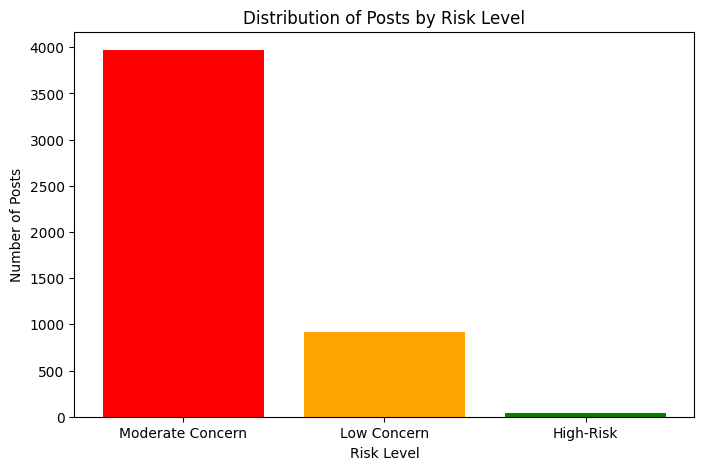

In [15]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

df = pd.read_csv('processed_reddit_data.csv')
df['proctext'] = df['proctext'].fillna('').astype(str)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

crisis_terms = [
    "die",
    "kill",
    "end it all",
    "hate life",
    "need help",
    "feel lost",
    "not live",
]

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

crisis_embeddings = np.array([get_bert_embeddings(term) for term in crisis_terms])

def classify_risk(text):
    post_embedding = get_bert_embeddings(text)
    similarities = cosine_similarity(post_embedding, crisis_embeddings.reshape(len(crisis_terms), -1))
    max_similarity = np.max(similarities)
    
    if max_similarity > 0.7:
        return "High-Risk"
    elif max_similarity > 0.4:
        return "Moderate Concern"
    else:
        return "Low Concern"

df['Risk_Level'] = df['proctext'].apply(classify_risk)

risk_counts = df['Risk_Level'].value_counts()
print(risk_counts)

plt.figure(figsize=(8,5))
plt.bar(risk_counts.index, risk_counts.values, color=['red', 'orange', 'green'])
plt.xlabel("Risk Level")
plt.ylabel("Number of Posts")
plt.title("Distribution of Posts by Risk Level")
plt.show()

df.to_csv("classified_reddit_data.csv", index=False)


In [17]:
# for category in ["High-Risk", "Moderate Concern", "Low Concern"]:
#     print(f"\nSample {category} Posts:")
#     sample_posts = df[df['Risk_Level'] == category]['selftext'].sample(min(3, len(df[df['Risk_Level'] == category]))).tolist()
#     for i, post in enumerate(sample_posts, 1):
#         print(f"{i}. {post}\n")

In [18]:
from transformers import RobertaTokenizer, RobertaModel
import torch
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

df = pd.read_csv('processed_reddit_data.csv')
df['proctext'] = df['proctext'].fillna('').astype(str)

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

/home/sakshi/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-29 01:29:43.066091: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 01:29:43.224963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743191983.282894   52948 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743191983.298796   52948 cuda_blas.cc:1407] Unable to 

In [19]:
def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()